In [3]:
import pandas as pd

In [4]:
ch14 = pd.read_csv("champions2014.csv", sep=";")

**Eliminamos las columnas que no vamos a necesitar**

In [5]:
ch14.head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance,Top Team Scorer,Goalkeeper,Notes
0,W,Real Madrid,13,10,2,1,41,10,31,32,"78,426",Cristiano Ronaldo 17,Iker Casillas,? Champions League via playoff win
1,F,Atletico Madrid,13,7,5,1,26,10,16,26,"43,994",Diego Costa 8,Thibaut Courtois,NaN
2,SF,Bayern Munich,12,6,4,2,24,13,11,22,"67,883",Thomas Muller 5,Manuel Neuer,NaN
3,SF,Chelsea,12,4,5,3,19,10,9,17,"39,531",Fernando Torres 4,Petr ?ech,NaN
4,QF,Paris S-G,10,6,2,2,25,9,16,20,"44,68",Zlatan Ibrahimovic 10,Salvatore Sirigu,NaN


In [6]:
#el máximo goleador, el nombre del portero y las notas no son datos que a priori vamos a necesitar
ch14.drop(['Top Team Scorer', 'Goalkeeper', 'Notes'], axis=1, inplace=True)

In [7]:
ch14.head(5)

,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Attendance
0,W,Real Madrid,13,10,2,1,41,10,31,32,"78,426"
1,F,Atletico Madrid,13,7,5,1,26,10,16,26,"43,994"
2,SF,Bayern Munich,12,6,4,2,24,13,11,22,"67,883"
3,SF,Chelsea,12,4,5,3,19,10,9,17,"39,531"
4,QF,Paris S-G,10,6,2,2,25,9,16,20,"44,68"


**Realizamos el mismo cambio para todos los datasets**

In [8]:
ch15 = pd.read_csv("champions2015.csv", sep=";")
ch16 = pd.read_csv("champions2016.csv", sep=";")
ch17 = pd.read_csv("champions2017.csv", sep=";")
ch18 = pd.read_csv("champions2018.csv", sep=";")
ch19 = pd.read_csv("champions2019.csv", sep=";")
ch20 = pd.read_csv("champions2020.csv", sep=";")
ch21 = pd.read_csv("champions2021.csv", sep=";")
ch22 = pd.read_csv("champions2022.csv", sep=";")
ch23 = pd.read_csv("champions2023.csv", sep=";")
ch24 = pd.read_csv("champions2024.csv", sep=";")

**Hay dos datasets (2022 y 2021) están en español así que debemos cambiar sus columnas a inglés**

In [9]:
ch22 = ch22.rename(columns={
    'RL': 'Rk',
    'Equipo': 'Squad',
    'PJ': 'MP',
    'PG': 'W',
    'PE': 'D',
    'PP': 'L',
    'GF': 'GF',
    'GC': 'GA',
    'DG': 'GD',
    'Pts': 'Pts',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90': 'xGD/90',
    'Asistencia': 'Attendance',
    'M�ximo Goleador del Equipo': 'Top Team Scorer',
    'Portero': 'Goalkeeper',
    'Notas': 'Notes'
})

ch21 = ch21.rename(columns={
    'RL': 'Rk',
    'Equipo': 'Squad',
    'PJ': 'MP',
    'PG': 'W',
    'PE': 'D',
    'PP': 'L',
    'GF': 'GF',
    'GC': 'GA',
    'DG': 'GD',
    'Pts': 'Pts',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90': 'xGD/90',
    'Asistencia': 'Attendance',
    'M�ximo Goleador del Equipo': 'Top Team Scorer',
    'Portero': 'Goalkeeper',
    'Notas': 'Notes'
})

ch21['Rk'] = ch21['Rk'].replace({'W': 1, 'S': 2})
ch22['Rk'] = ch22['Rk'].replace({'W': 1, 'S': 2})

In [10]:
print(ch22)

     Rk             Squad  MP   W  D  L  GF  GA  GD  Pts    xG   xGA   xGD  \
0     1       Real Madrid  13   9  0  4  29  14  15   27  21.6  20.1   1.5   
1     2         Liverpool  13  10  1  2  30  14  16   31  27.3  13.1  14.2   
2    SF   Manchester City  12   7  2  3  29  16  13   23  26.6  11.5  15.1   
3    SF        Villarreal  12   5  3  4  20  16   4   18  19.4  18.6   0.9   
4    QF     Bayern Munich  10   7  2  1  31   7  24   23  26.3   7.7  18.6   
5    QF           Chelsea  10   7  1  2  21  10  11   22  19.0  11.0   8.0   
6    QF           Benfica  10   3  4  3  14  17  -3   13  11.8  21.4  -9.7   
7    QF   Atletico Madrid  10   3  3  4   9  10  -1   12  12.2  13.2  -1.1   
8   R16              Ajax   8   6  1  1  22   8  14   19  19.0  10.0   8.9   
9   R16          Juventus   8   5  1  2  11  10   1   16  13.3  10.6   2.7   
10  R16         Paris S-G   8   4  2  2  15  11   4   14  14.5  13.9   0.6   
11  R16             Inter   8   4  1  3   9   7   2   13  12.8  

In [11]:
data_list = [ch15,ch16,ch17,ch18,ch19,ch20,ch21,ch22,ch23,ch24]
for i in data_list:
  i.drop(['Top Team Scorer', 'Goalkeeper', 'Notes'], axis=1, inplace=True)

In [12]:
data_list.append(ch14)

In [13]:
#comprobamos si hay algún equipo con dos nombres distintos
teams = []
for dataset in data_list:
  column_values_list = dataset['Squad'].tolist()
  teams += column_values_list

teams = list(set(teams))

In [14]:
teams.sort()
teams
#Beşiktaş -> Besiktas, 'Malmö'-> Malmo, Viktoria Plze? -> "Viktoria Plzen"

['AEK Athens',
 'APOEL FC',
 'Ajax',
 'Anderlecht',
 'Antwerp',
 'Arsenal',
 'Atalanta',
 'Athletic Club',
 'Atletico Madrid',
 'Austria Wien',
 'BATE Borisov',
 'Barcelona',
 'Basaksehir',
 'Basel',
 'Bayern Munich',
 'Benfica',
 'Besiktas',
 'Beşiktaş',
 'Braga',
 'CSKA Moscow',
 'Celtic',
 'Chelsea',
 'Club Brugge',
 'Dinamo Zagreb',
 'Dortmund',
 'Dynamo Kyiv',
 'Eint Frankfurt',
 'FC Astana',
 'FC Copenhagen',
 'Ferencvaros',
 'Feyenoord',
 'Galatasaray',
 'Genk',
 'Gent',
 'Hoffenheim',
 'Inter',
 'Juventus',
 'Krasnodar',
 'Lazio',
 'Legia Warsaw',
 'Leicester City',
 'Lens',
 'Leverkusen',
 'Lille',
 'Liverpool',
 'Loko Moscow',
 'Ludogorets',
 'Lyon',
 "M'Gladbach",
 'Maccabi Haifa',
 'Maccabi Tel Aviv',
 'Malmo',
 'Malmö',
 'Manchester City',
 'Manchester Utd',
 'Marseille',
 'Midtjylland',
 'Milan',
 'Monaco',
 'NK Maribor',
 'Napoli',
 'Newcastle Utd',
 'Olympiacos',
 'PSV Eindhoven',
 'Paris S-G',
 'Porto',
 'Qarabağ FK',
 'RB Leipzig',
 'RB Salzburg',
 'Rangers',
 'Real M

**Comprobamos que hay algunos equipos que están repetidos y otros que no tienen buenos nombres, por lo que procedemos a hacer los siguientes cambios #Beşiktaş -> Besiktas, Malmö-> Malmo, Viktoria Plze? -> Viktoria Plzen**

In [15]:
name_changes = {
    'Beşiktaş': 'Besiktas',
    'Malmö': 'Malmo',
    'Viktoria Plze?': 'Viktoria Plzen'
}

for dataset in data_list:
  dataset['Squad'] = dataset['Squad'].replace(name_changes)

Ahora vamos a añadir un id a cada uno de los equipos por su nombre

In [16]:
#actualizar la lista equipos sin duplicados

#comprobamos si hay algún equipo con dos nombres distintos
teams = []
for dataset in data_list:
  column_values_list = dataset['Squad'].tolist()
  teams += column_values_list

teams = list(set(teams))

# Crear un diccionario para mapear cada equipo a un ID único


equipos_id = {nombre: idx + 1 for idx, nombre in enumerate(teams)}

equipos_id

{'Lens': 1,
 'Anderlecht': 2,
 'Roma': 3,
 'Basel': 4,
 'Villarreal': 5,
 'Dinamo Zagreb': 6,
 'FC Copenhagen': 7,
 'Club Brugge': 8,
 'Porto': 9,
 'NK Maribor': 10,
 'APOEL FC': 11,
 'Shakhtar': 12,
 'Celtic': 13,
 'Dynamo Kyiv': 14,
 'Monaco': 15,
 'Midtjylland': 16,
 'Atalanta': 17,
 'Viktoria Plzen': 18,
 'Paris S-G': 19,
 'RB Salzburg': 20,
 'Lazio': 21,
 'Maccabi Tel Aviv': 22,
 'AEK Athens': 23,
 'Real Madrid': 24,
 'Real Sociedad': 25,
 'Milan': 26,
 'Braga': 27,
 'Union Berlin': 28,
 'Manchester Utd': 29,
 'Legia Warsaw': 30,
 'Antwerp': 31,
 'Spartak Moscow': 32,
 'Dortmund': 33,
 'Liverpool': 34,
 'Leicester City': 35,
 'Loko Moscow': 36,
 'Red Star': 37,
 'Galatasaray': 38,
 "M'Gladbach": 39,
 'Sporting CP': 40,
 'Valencia': 41,
 'Marseille': 42,
 'Zenit': 43,
 'Manchester City': 44,
 'Malmo': 45,
 'Schalke 04': 46,
 'Gent': 47,
 'Rennes': 48,
 'Sevilla': 49,
 'Genk': 50,
 'Austria Wien': 51,
 'BATE Borisov': 52,
 'Arsenal': 53,
 'Leverkusen': 54,
 'Athletic Club': 55,
 'Sl

In [17]:
for df in data_list:
  df['team_id'] = df['Squad'].map(equipos_id)

Ahora trabajaremos con el ranking_UEFA, que posteriormente añadiremos a cada uno de los datasets

In [18]:
ranking = pd.read_csv("ranking_UEFA.csv")

In [19]:
ranking.head(5)

,Rank,Team,Country,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24,Title points,Total points,Country part
0,1.0,Real Madrid,Esp,29.0,33.0,33.0,32.0,19.0,17.0,26.0,30.0,29.0,23.0,94.0,365.0,37.986
1,2.0,Bayern MÃ¼nchen,Ger,28.0,29.0,22.0,29.0,20.0,36.0,27.0,26.0,27.0,20.0,43.0,307.0,30.624
2,3.0,FC Barcelona,Esp,34.0,26.0,23.0,25.0,30.0,24.0,20.0,15.0,9.0,17.0,41.0,264.0,37.986
3,4.0,Manchester City,Eng,15.0,26.0,18.0,22.0,25.0,25.0,35.0,27.0,33.0,23.0,13.0,262.0,37.253
4,5.0,Liverpool,Eng,10.0,22.0,NaN,30.0,29.0,18.0,24.0,33.0,19.0,13.0,36.0,234.0,37.253


In [20]:
#tenemos un problema, no todos los equipos del dataset de ranking uefa estan en el resto de datasets, por los que debemos droppearlos

#además, los nombres de los equipos entre ambos datasets no son del todo coincidentes

columna_UEFA = set(list(ranking['Team']))
teams = set(teams)

equipos_coincidentes = teams & columna_UEFA

equipos_coincidentes

{'AEK Athens',
 'Ajax',
 'Anderlecht',
 'Arsenal',
 'Atalanta',
 'Austria Wien',
 'BATE Borisov',
 'Benfica',
 'Besiktas',
 'CSKA Moscow',
 'Celtic',
 'Chelsea',
 'Club Brugge',
 'Dinamo Zagreb',
 'Dynamo Kyiv',
 'Feyenoord',
 'Galatasaray',
 'Juventus',
 'Lazio',
 'Legia Warsaw',
 'Leicester City',
 'Liverpool',
 'Maccabi Haifa',
 'Manchester City',
 'NK Maribor',
 'Napoli',
 'PSV Eindhoven',
 'RB Leipzig',
 'Real Madrid',
 'Real Sociedad',
 'Schalke 04',
 'Sevilla',
 'Sheriff Tiraspol',
 'Spartak Moscow',
 'Union Berlin',
 'Valencia',
 'Viktoria Plzen',
 'Villarreal',
 'Young Boys'}

In [21]:
#coinciden unicamente 39 equipos de 90
len(equipos_coincidentes)

39

In [22]:
# Nombres en la lista que no están en el dataset, los buscaremos para cambiarlos
nombres_faltantes_en_dataset = teams - columna_UEFA
nombres_faltantes_en_dataset

{'APOEL FC',
 'Antwerp',
 'Athletic Club',
 'Atletico Madrid',
 'Barcelona',
 'Basaksehir',
 'Basel',
 'Bayern Munich',
 'Braga',
 'Dortmund',
 'Eint Frankfurt',
 'FC Astana',
 'FC Copenhagen',
 'Ferencvaros',
 'Genk',
 'Gent',
 'Hoffenheim',
 'Inter',
 'Krasnodar',
 'Lens',
 'Leverkusen',
 'Lille',
 'Loko Moscow',
 'Ludogorets',
 'Lyon',
 "M'Gladbach",
 'Maccabi Tel Aviv',
 'Malmo',
 'Manchester Utd',
 'Marseille',
 'Midtjylland',
 'Milan',
 'Monaco',
 'Newcastle Utd',
 'Olympiacos',
 'Paris S-G',
 'Porto',
 'Qarabağ FK',
 'RB Salzburg',
 'Rangers',
 'Red Star',
 'Rennes',
 'Roma',
 'Rostov',
 'Shakhtar',
 'Slavia Prague',
 'Sporting CP',
 'Steaua',
 'Tottenham',
 'Wolfsburg',
 'Zenit'}

In [23]:
'''
APOEL Nicosia -> APOEL FC
Royal Antwerp - Antwerp
Athletic Bilbao -> Athletic Club
AtlÃ©tico Madrid -> Atletico Madrid
FC Barcelona -> Barcelona
Istanbul Basaksehir -> Basaksehir
Bayern MÃ¼nchen -> Bayern Munich
Sporting Braga -> Braga
Borussia Dortmund -> Dortmund
Eintracht Frankfurt -> Eint Frankfurt
FK Astana -> FC Astana
FC KÃ¸benhavn -> FC Copenhagen
FerencvÃ¡ros -> Ferencvaros
Racing Genk -> Genk
1899 Hoffenheim --> Hoffenheim
Internazionale --> Inter
RC Lens --> Lens
FK Krasnodar --> Krasnodar
Bayern Leverkusen --> Leverkusen
Lille OSC --> Lille
Lokomotiv Moscow --> Loko Moscow
Ludogorets Razgrad --> Ludogorets
Olympique Lyon--> Lyon
Borussia MÃ¶nchengladbach --> M'Gladbach
Maccabi Tel-Aviv --> Maccabi Tel Aviv
MalmÃ¶ FF --> Malmo
Manchester United --> Manchester Utd
Olympique Marseille --> Marseille
FC Midtjylland --> Midtjylland
AC Milan --> Milan
AS Monaco -> Monaco
Newcastle United -> Newcastle Utd
Olympiakos Piraeus -> Olympiacos
Paris Saint-Germain ->Paris S-G
FC Porto -> Porto
Qarabag FK -> Qarabağ FK
FC Salzburg --> RB Salzburg
Glasgow Rangers --> Rangers
Red Star Belgrade --> Red Star
Stade Rennais --> Rennes
AS Roma --> Roma
FK Rostov --> Rostov
Shakhtar Donetsk --> Shakhtar
Slavia Praha --> Slavia Prague
Sporting CP Lisbon --> Sporting CP
Tottenham Hotspur --> Tottenham
VfL Wolfsburg --> Wolfsburg
Zenit St. Petersburg --> Zenit
FCSB --> Steaua



'''

"\nAPOEL Nicosia -> APOEL FC\nRoyal Antwerp - Antwerp\nAthletic Bilbao -> Athletic Club\nAtlÃ©tico Madrid -> Atletico Madrid\nFC Barcelona -> Barcelona\nIstanbul Basaksehir -> Basaksehir\nBayern MÃ¼nchen -> Bayern Munich\nSporting Braga -> Braga\nBorussia Dortmund -> Dortmund\nEintracht Frankfurt -> Eint Frankfurt\nFK Astana -> FC Astana\nFC KÃ¸benhavn -> FC Copenhagen\nFerencvÃ¡ros -> Ferencvaros\nRacing Genk -> Genk\n1899 Hoffenheim --> Hoffenheim\nInternazionale --> Inter\nRC Lens --> Lens\nFK Krasnodar --> Krasnodar\nBayern Leverkusen --> Leverkusen\nLille OSC --> Lille\nLokomotiv Moscow --> Loko Moscow\nLudogorets Razgrad --> Ludogorets\nOlympique Lyon--> Lyon\nBorussia MÃ¶nchengladbach --> M'Gladbach\nMaccabi Tel-Aviv --> Maccabi Tel Aviv\nMalmÃ¶ FF --> Malmo\nManchester United --> Manchester Utd\nOlympique Marseille --> Marseille\nFC Midtjylland --> Midtjylland\nAC Milan --> Milan\nAS Monaco -> Monaco\nNewcastle United -> Newcastle Utd\nOlympiakos Piraeus -> Olympiacos\nParis Sa

In [24]:
def buscar_subcadena(lista_strings, subcadena):

    # Filtramos la lista de strings basándonos en si contienen o no la subcadena
    resultados = [s for s in lista_strings if subcadena in s]
    return resultados

In [44]:
buscar_subcadena(columna_UEFA,"Bas")

['Basaksehir', 'FC Basel']

In [46]:
def replace_team_names(df, column_name):
    replacements = {
        'FC Basel':'Basel',
        'APOEL Nicosia': 'APOEL FC',
        'Royal Antwerp': 'Antwerp',
        'Athletic Bilbao': 'Athletic Club',
        'AtlÃ©tico Madrid': 'Atletico Madrid',
        'FC Barcelona': 'Barcelona',
        'Istanbul Basaksehir': 'Basaksehir',
        'Bayern MÃ¼nchen': 'Bayern Munich',
        'Sporting Braga': 'Braga',
        'Borussia Dortmund': 'Dortmund',
        'Eintracht Frankfurt': 'Eint Frankfurt',
        'FK Astana': 'FC Astana',
        'FC KÃ¸benhavn': 'FC Copenhagen',
        'FerencvÃ¡ros': 'Ferencvaros',
        'AA Gent': 'Gent',
        '1899 Hoffenheim': 'Hoffenheim',
        'Internazionale': 'Inter',
        'RC Lens': 'Lens',
        'FK Krasnodar': 'Krasnodar',
        'Bayer Leverkusen': 'Leverkusen',
        'Lille OSC': 'Lille',
        'Lokomotiv Moscow': 'Loko Moscow',
        'Ludogorets Razgrad': 'Ludogorets',
        'Olympique Lyon': 'Lyon',
        'Borussia MÃ¶nchengladbach': "M'Gladbach",
        'Maccabi Tel-Aviv': 'Maccabi Tel Aviv',
        'MalmÃ¶ FF': 'Malmo',
        'Manchester United': 'Manchester Utd',
        'Olympique Marseille': 'Marseille',
        'FC Midtjylland': 'Midtjylland',
        'AC Milan': 'Milan',
        'AS Monaco': 'Monaco',
        'Newcastle United': 'Newcastle Utd',
        'Olympiakos Piraeus': 'Olympiacos',
        'Paris Saint-Germain': 'Paris S-G',
        'FC Porto': 'Porto',
        'Qarabag FK': 'Qarabağ FK',
        'FC Salzburg': 'RB Salzburg',
        'Glasgow Rangers': 'Rangers',
        'Red Star Belgrade': 'Red Star',
        'Stade Rennais': 'Rennes',
        'AS Roma': 'Roma',
        'FK Rostov': 'Rostov',
        'Shakhtar Donetsk': 'Shakhtar',
        'Slavia Praha': 'Slavia Prague',
        'Sporting CP Lisbon': 'Sporting CP',
        'Tottenham Hotspur': 'Tottenham',
        'VfL Wolfsburg': 'Wolfsburg',
        'Zenit St. Petersburg': 'Zenit',
        'FCSB': 'Steaua'
    }

    df[column_name] = df[column_name].replace(replacements)
    return df

In [47]:
ranking = replace_team_names(ranking, "Team")
ranking

,Rank,Team,Country,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24,Title points,Total points,Country part
0,1.0,Real Madrid,Esp,29.00,33.00,33.00,32.00,19.0,17.0,26.0,30.0,29.0,23.0,94.0,365.00,37.986
1,2.0,Bayern Munich,Ger,28.00,29.00,22.00,29.00,20.0,36.0,27.0,26.0,27.0,20.0,43.0,307.00,30.624
2,3.0,Barcelona,Esp,34.00,26.00,23.00,25.00,30.0,24.0,20.0,15.0,9.0,17.0,41.0,264.00,37.986
3,4.0,Manchester City,Eng,15.00,26.00,18.00,22.00,25.0,25.0,35.0,27.0,33.0,23.0,13.0,262.00,37.253
4,5.0,Liverpool,Eng,10.00,22.00,NaN,30.00,29.0,18.0,24.0,33.0,19.0,13.0,36.0,234.00,37.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565.0,UE Santa Coloma,And,0.25,NaN,0.25,0.25,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.75,1.565
565,566.0,FC Lusitanos,And,NaN,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,1.565
566,567.0,Cosmos,Sma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.00,0.499
567,568.0,Juvenes Dogana,Sma,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,0.499


In [29]:
import matplotlib.pyplot as plt

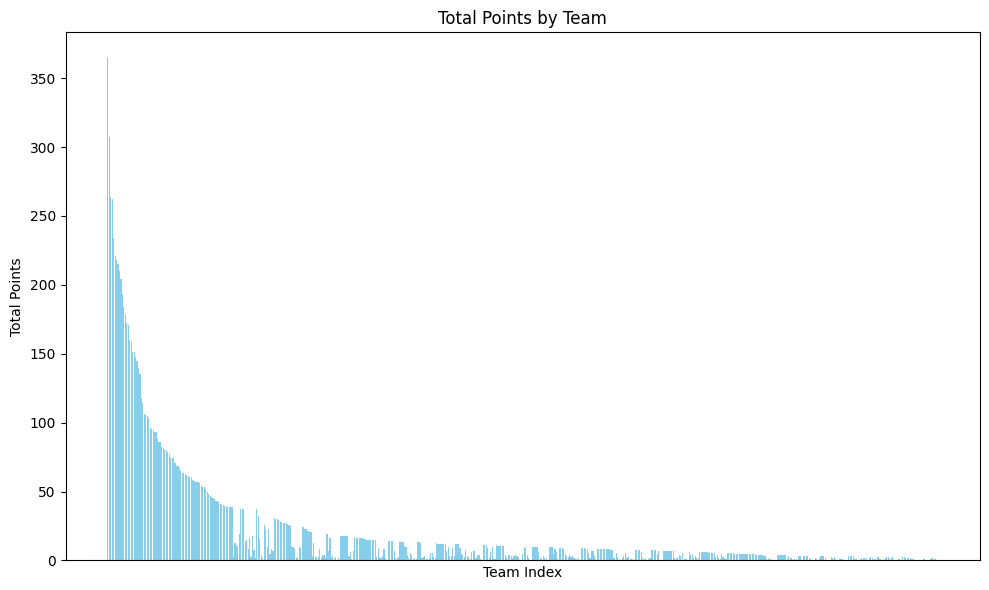

In [48]:
#vemos que hay muchisimos equipos con una cantidad de puntos menor a 50 en el dataset original

plt.figure(figsize=(10, 6))
plt.bar(range(len(ranking['Team'])), ranking['Total points'], color='skyblue')
plt.xlabel('Team Index')
plt.ylabel('Total Points')
plt.title('Total Points by Team')
# Ocultando los nombres de los equipos en el eje X
plt.xticks([])
plt.tight_layout()
plt.show()

In [54]:
ranking['Total points'].mean()

20.696397188049207

In [49]:
# coinciden todos
columna_UEFA = set(list(ranking['Team']))
nombres_faltantes_en_dataset = 'FC Basel' - columna_UEFA
nombres_faltantes_en_dataset

set()

In [51]:
ranking_filtrado = ranking[ranking['Team'].isin(teams)]
ranking_filtrado

,Rank,Team,Country,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24,Title points,Total points,Country part
0,1.0,Real Madrid,Esp,29.0,33.0,33.0,32.0,19.0,17.0,26.0,30.0,29.0,23.0,94.0,365.0,37.986
1,2.0,Bayern Munich,Ger,28.0,29.0,22.0,29.0,20.0,36.0,27.0,26.0,27.0,20.0,43.0,307.0,30.624
2,3.0,Barcelona,Esp,34.0,26.0,23.0,25.0,30.0,24.0,20.0,15.0,9.0,17.0,41.0,264.0,37.986
3,4.0,Manchester City,Eng,15.0,26.0,18.0,22.0,25.0,25.0,35.0,27.0,33.0,23.0,13.0,262.0,37.253
4,5.0,Liverpool,Eng,10.0,22.0,NaN,30.0,29.0,18.0,24.0,33.0,19.0,13.0,36.0,234.0,37.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134.0,AEK Athens,Gre,NaN,NaN,1.0,9.0,4.0,2.5,3.0,1.5,NaN,3.0,NaN,24.0,11.185
135,136.0,Antwerp,Bel,NaN,NaN,NaN,NaN,NaN,2.5,8.0,4.0,2.5,6.0,NaN,23.0,17.220
161,162.0,Maccabi Haifa,Isr,NaN,NaN,0.5,NaN,NaN,1.5,2.5,3.0,6.0,4.0,NaN,17.5,9.750
174,NaN,Austria Wien,Aut,NaN,NaN,4.0,4.0,NaN,2.0,NaN,1.5,2.5,2.0,NaN,16.0,12.650


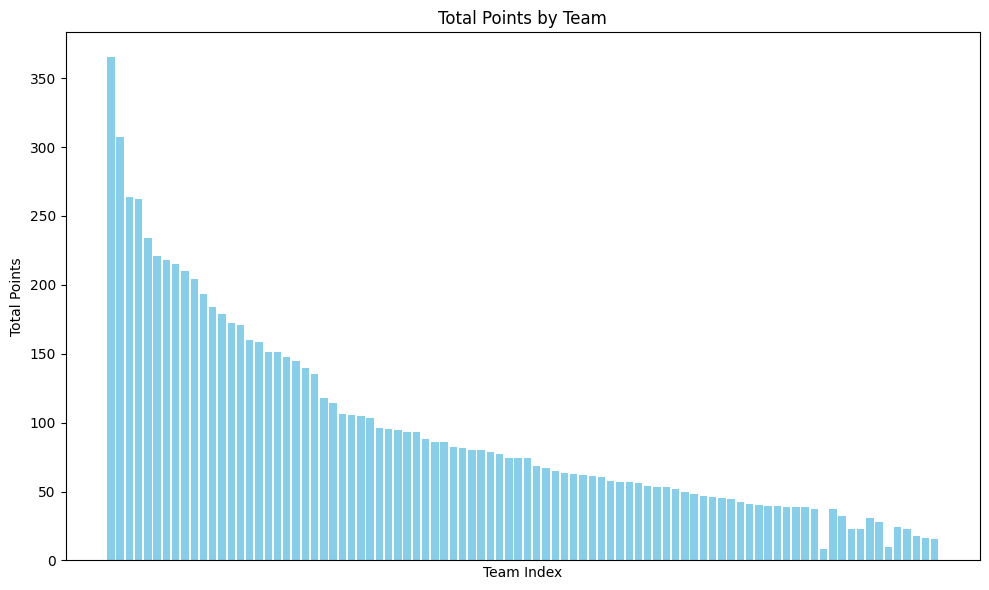

In [53]:
#ahora que hemos filtrado el dataset únicamente a aquellos que han participado en las últimas champions, vemos como el ranking UEFA de los equipos ha aumentado

plt.figure(figsize=(10, 6))
plt.bar(range(len(ranking_filtrado['Team'])), ranking_filtrado['Total points'], color='skyblue')
plt.xlabel('Team Index')
plt.ylabel('Total Points')
plt.title('Total Points by Team')
# Ocultando los nombres de los equipos en el eje X
plt.xticks([])
plt.tight_layout()
plt.show()

In [56]:
ranking_filtrado['Total points'].mean()

95.00277777777778

Vemos como los filtrando los equipos que han jugado la champions los últimos años tienen un ranking Uefa considerablemente superior a la mezcla de todos los equipos

Por tanto, podemos considerar el ranking Uefa como una medida relativamente fidedigna del valor real de un equipo